In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


Test U-Net

In [2]:
data = dataset_seq()
loaders = get_loaders(data, 1)

In [3]:
name = 'NN_library/AutoUnet/AutoUnet_w_Conv_norm'
args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : name}
unet = AutoUNet()
unet = load_network(unet, args['name'], args)

In [4]:
L_dam = test(unet, loaders, args)
L_dam = np.array(L_dam)

In [5]:
dam_mean = L_dam.sum(axis=1).mean()
dam_std = L_dam.sum(axis=1).std()
print(dam_mean, '\n', dam_std)

0.10062119 
 0.086624585


In [6]:
dam_mean = np.mean(L_dam, axis=0)
dam_std = np.std(L_dam, axis=0)
print(dam_mean, '\n', dam_std)

[9.0310482e-07 6.6524133e-04 3.1545719e-03 6.2303892e-03 9.0975789e-03
 1.1723094e-02 1.4147756e-02 1.6415020e-02 1.8560404e-02 2.0626253e-02] 
 [4.7157354e-07 3.7072756e-04 2.7793334e-03 5.9203058e-03 8.6797271e-03
 1.0930959e-02 1.2811290e-02 1.4385374e-02 1.5632473e-02 1.6588558e-02]


Text(0, 0.5, 'Damage loss')

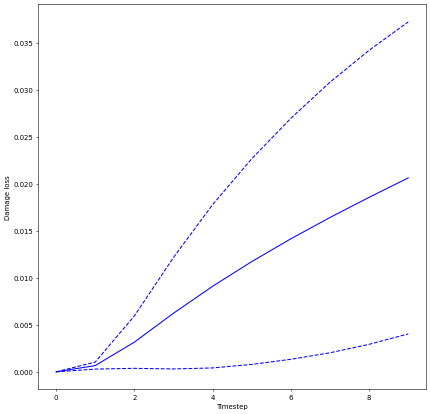

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=50)

axs.plot(dam_mean, 'b')
axs.plot(dam_mean+dam_std, 'b--')
axs.plot(dam_mean-dam_std, 'b--')
axs.set_xlabel('Timestep')
axs.set_ylabel('Damage loss')

In [12]:
data = dataset_seq('weird')

In [13]:
unet = unet.to(args['dev'])

In [14]:
seq_test_dam = [[] for i in range(11)]
dam = []
geom = []
for i in range(11):
    geometry, damage, imp_shrinkage, _, _ = data.__getitem__(i)
    geometry = geometry.to(args['dev'])
    damage = damage.to(args['dev'])
    imp_shrinkage = imp_shrinkage.to(args['dev'])
    dam.append(damage)
    geom.append(geometry)
    for n in range(10):
        if n == 0:
            x = torch.cat([geometry, imp_shrinkage[[n],:,:], damage[[n],:,:]], axis=1).view(1,3,99,99)
        else:
            x = torch.cat([geometry, imp_shrinkage[[n],:,:], y[0].detach()], axis=1).view(1,3,99,99)
        y = unet(x)
        seq_test_dam[i].append(y.detach().cpu())

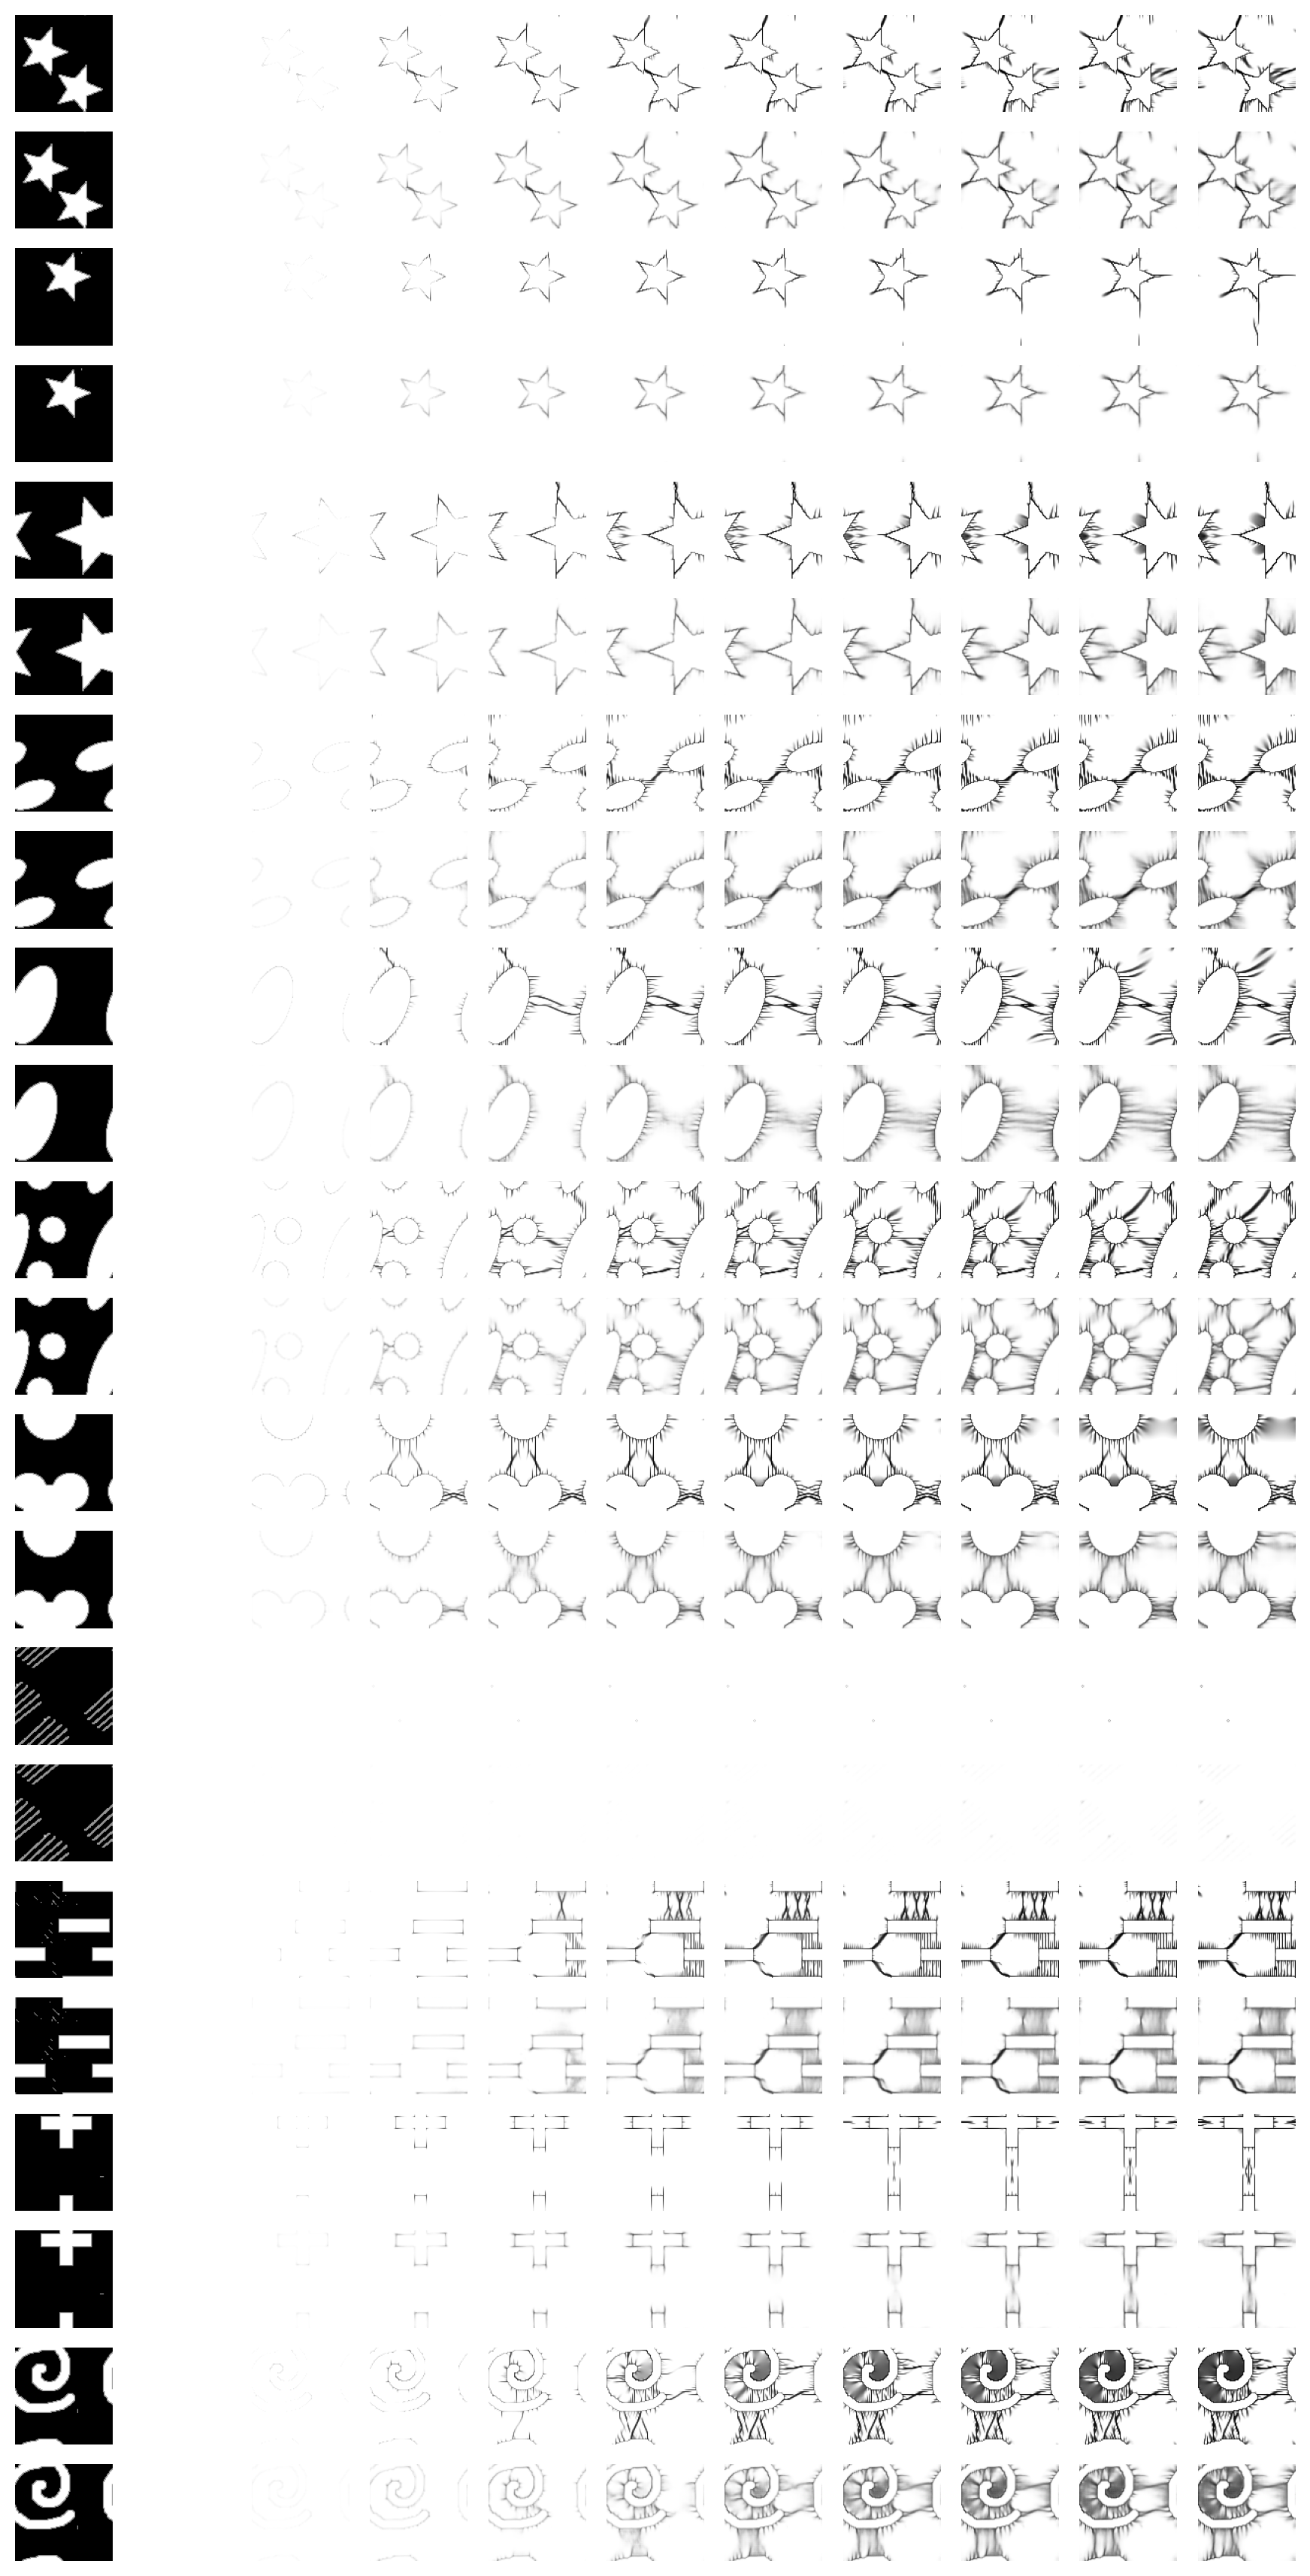

In [15]:
fig, axs = plt.subplots(nrows=22, ncols=11, figsize=(11, 22), dpi=200)
for i in range(11):
    axs[2*i, 0].imshow(geom[i][0].cpu().detach().cpu().numpy(), cmap='Greys', vmin=0, vmax=1)
    axs[2*i+1, 0].imshow(geom[i][0].cpu().detach().cpu().numpy(), cmap='Greys', vmin=0, vmax=1)
    axs[2*i, 0].set_axis_off()
    axs[2*i+1, 0].set_axis_off()
    for j in range(1,11):
        axs[2*i, j].imshow(dam[i][j].cpu().detach().cpu().numpy(), cmap='Greys', vmin=0, vmax=1)
        axs[2*i, j].set_axis_off()
    for j in range(1,11):
        axs[2*i+1, j].imshow(seq_test_dam[i][j-1][0, 0].cpu(), cmap='Greys', vmin=0, vmax=1)
        axs[2*i+1, j].set_axis_off()

In [3]:
from NN_library.ConvNet.ConvNet import *

unet = AutoUNet()
convnet = ConvNet(16)

args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : 'NN_library/ConvNet/Conv_w_AutoUnet'}
convnet = load_network(convnet, 'NN_library/ConvNet/Conv_w_AutoUnet_0', args)
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_w_Conv_0', args)  

Using device: cuda


In [4]:
L_dam, L_stiff, L_shr = test_w_Convnet(unet, convnet, loaders, args)
L_dam = np.array(L_dam)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)

In [5]:
dam_mean = L_dam.sum(axis=1).mean()
dam_std = L_dam.sum(axis=1).std()
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(dam_mean, '\n', dam_std)
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

0.08886357 
 0.07912564
0.051953424 
 0.036724236
0.08754781 
 0.05247015


In [6]:
dam_mean = np.mean(L_dam, axis=0)
dam_std = np.std(L_dam, axis=0)
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)
print(dam_mean, '\n', dam_std)
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[1.6130339e-09 5.3990859e-04 2.5665576e-03 5.3176442e-03 7.9420824e-03
 1.0338872e-02 1.2530978e-02 1.4578189e-02 1.6553605e-02 1.8495779e-02] 
 [3.03105843e-08 3.67445289e-04 2.70437263e-03 5.67824533e-03
 8.18939041e-03 1.01444460e-02 1.16824564e-02 1.28972875e-02
 1.38806086e-02 1.46961575e-02]
[0.0004575  0.00087573 0.00142852 0.00287155 0.00455834 0.00575078
 0.0069103  0.00840136 0.00975957 0.01093978] 
 [0.00046082 0.00070436 0.00118671 0.00232842 0.00369721 0.00465536
 0.00567322 0.00678704 0.00822936 0.01021087]
[3.0895520e-05 1.1545018e-03 5.7104221e-03 9.7564617e-03 1.1347332e-02
 1.1736468e-02 1.2034321e-02 1.1817959e-02 1.1883325e-02 1.2076128e-02] 
 [2.1859118e-05 1.0755197e-03 5.5857748e-03 8.3665419e-03 9.3631735e-03
 1.0192601e-02 1.0546403e-02 1.0061243e-02 1.0136147e-02 1.0911005e-02]
